In [1]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
#loading data
pd.options.display.precision = 15
df = pd.read_csv("data.csv")
df.head(20)

,x-values,y-values
0,-3.14159265358979,0.00000000000000
1,-2.81089869005402,-0.43702230525987
2,-2.48020472651826,-0.78170987707147
3,-2.14951076298249,-0.85207605602719
4,-1.81881679944672,-0.52335935447908
5,-1.48812283591095,0.22121102681686
6,-1.15742887237519,1.27130734031775
7,-0.82673490883942,2.41089249371528
8,-0.49604094530365,3.37539264122665
9,-0.16534698176788,3.92749194128624


In [3]:
#update index to start at 1
df.index = df.index + 1

In [4]:
#set x column to x and y column to y
np.set_printoptions(precision = 15)
x = df.iloc[:, :1].values
y = df.iloc[:, 1].values
y = y.reshape((len(y), 1))

In [5]:
#Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
degree = 4
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(x, y)
x_seq = np.arange(x.min(), x.max(), .01).reshape(-1, 1)


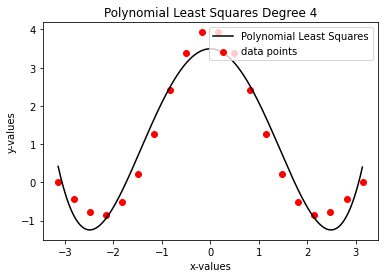

In [6]:
#fitting the polynomial least squares lines to the data points 
coefs = np.polyfit(x.flatten(), y.flatten(), 4)
plt.figure()
plt.plot(x_seq, np.polyval(coefs, x_seq), color='black', label = 'Polynomial Least Squares')
plt.title("Polynomial Least Squares Degree 4")
plt.xlabel("x-values")
plt.ylabel("y-values")
plt.scatter(x, y, color = 'red', label = 'data points')
plt.legend(loc = "upper right")
plt.show()

In [7]:
# Coefficient values of p4(x) = [a4*x^4, a3*x^3, a2*x^2, a1*x, a0]
rounded = np.around(coefs, 4)
print(coefs)
print(rounded)

[ 1.232779529340900e-01 -1.758927253926901e-16 -1.528509993122892e+00
  7.796558783527172e-16  3.495032603345816e+00]
[ 0.1233 -0.     -1.5285  0.      3.495 ]


In [8]:
#flatten the data points to be 1D
xflat = x.flatten()
yflat = y.flatten()

In [9]:
#pt.2
#Calculating the coefficient values for the trigonometric polynomial
#coef array is the pseudo inverse of the function
#coef = inverse(A.T * A) * A.T * Y
#A = [1, cos(x), cos(2x), cos(3x), sin(x), sin(2x)] -> array[[array]]
A = np.array([np.ones(len(xflat)), np.cos(xflat), np.cos(2 * xflat), np.cos(3 * xflat), np.sin(xflat), np.sin(2 * xflat)])
pinv = np.linalg.pinv(A)
a = np.dot(pinv.T, y)
#rounding to  4 decimal digits
rounding = np.around(a, 4).flatten()
#function to calculate the yvalue approximations
def s(x):
    return a[0] + a[1] * np.cos(x) + a[2] * np.cos(2 * x) + a[3] * np.cos(3 * x) + a[4] * np.sin(x) + a[5] * np.sin(2 * x)
#arranging for smoother curve
xval = np.arange(np.min(xflat), np.max(xflat), .01)
print(rounding)

[ 0.9153  2.2202  0.975  -0.1641  0.     -0.    ]


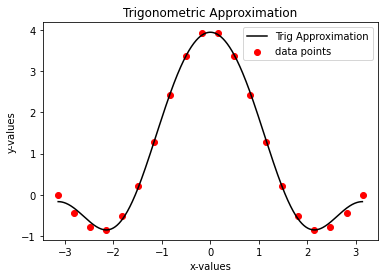

In [10]:
#plotting the figure
plt.figure()
plt.plot(xval, s(xval) , color='black', label = 'Trig Approximation')
plt.title("Trigonometric Approximation")
plt.xlabel("x-values")
plt.ylabel("y-values")
plt.scatter(x, y, color = 'red', label="data points")
plt.legend(loc = "upper right")
plt.show()
